In [4]:
import sys
COVID_dir = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling' # set this to your directory
sys.path.insert(1, COVID_dir) 

In [5]:
import numpy as np
from numpy import genfromtxt
import scipy.io
from test import recover_pool_results, test_shental, test_random_M, get_accuracy, get_num_errors
from optimal_sizes import optimal_pool_size, entropy, optimal_column_weight
from membership_matrix import generate_const_col_weight, generate_doubly_regular_col
import matplotlib.pyplot as plt
import json

In [6]:
n = 384
T = 48
fpr, fnr = 0, 0
num_random_matrices = 25
num_trials = 100
shental_matrix_filepath = '/Users/yiningliu/research/pooled-sampling/COVID-19-pooling/tests/data/shental-poolingMatrix.mat'

In [7]:
def plot_accuracy(k, error_type, generate_matrix):
    const_col_dir = COVID_dir + '/tests/results/' + generate_matrix + '/'
    
    x, y, average_acc = get_accuracy(COVID_dir, const_col_dir, n, k, T, num_trials, num_random_matrices, col_weights, error_type)

    plt.scatter(x, y)
    plt.xlabel('column weights')
    plt.ylabel('num_errors')
    title = 'Scatter plot for constant-column weight accuracy (f = %s/384) based on % s' % (k, error_type)
    plt.title(title)
    plt.show() 

    if error_type == 'num_errors':
        print("theoretical optimal column weight: %.3f" % optimal_column_weight(k/n, fnr, fpr, T, n))
        optimal_weight = col_weights[average_acc.index(np.max(average_acc))]
        print("empirical optimal column weight: %.3f" % optimal_weight)
        print("------------------------------------------------------------")

def plot_num_errors(k, error_type, generate_matrix):
    const_col_dir = COVID_dir + '/tests/results/' + generate_matrix + '/'
    
    x, y, average_num_errors = get_num_errors(const_col_dir, n, k, T, num_random_matrices, col_weights, error_type)
    plt.scatter(x, y)
    plt.scatter(6, shental_num_errors[k-1], c="red")
    plt.xlabel('column weights')
    plt.ylabel('accuracy')
    title = 'Scatter plot for constant-column weight errors (f = %s/384) based on % s' % (k, error_type)
    plt.title(title)
    plt.show() 

    if error_type == 'num_errors':
        print("theoretical optimal column weight: %.3f" % optimal_column_weight(k/n, fnr, fpr, T, n))
        optimal_weight = col_weights[average_num_errors.index(np.min(average_num_errors))]
        print("empirical optimal column weight: %.3f" % optimal_weight)
        print("------------------------------------------------------------")

# Constant Column Weight

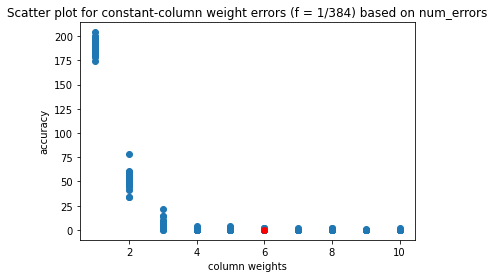

theoretical optimal column weight: 33.000
empirical optimal column weight: 9.000
------------------------------------------------------------


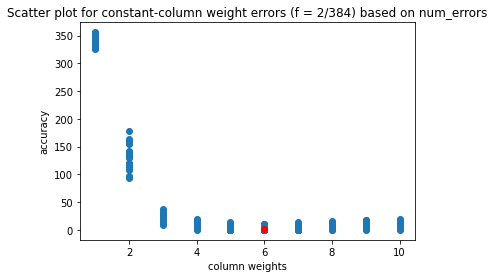

theoretical optimal column weight: 17.000
empirical optimal column weight: 5.000
------------------------------------------------------------


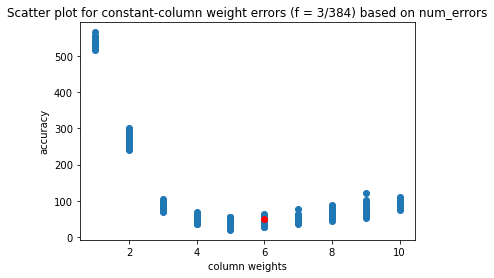

theoretical optimal column weight: 11.000
empirical optimal column weight: 5.000
------------------------------------------------------------


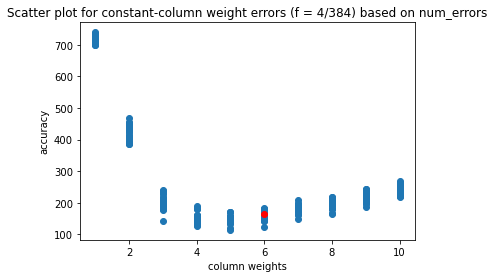

theoretical optimal column weight: 8.000
empirical optimal column weight: 5.000
------------------------------------------------------------


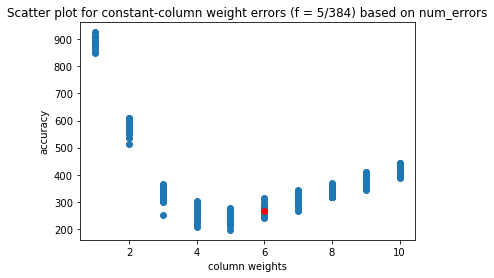

theoretical optimal column weight: 7.000
empirical optimal column weight: 5.000
------------------------------------------------------------


In [16]:
col_weights = range(1, 11)
num_trials = 100 
for k in range(1, 6): 
    plot_num_errors(k, 'num_errors', 'generate_const_col_weight')

# Constant Column Weight, Constant Row Weight

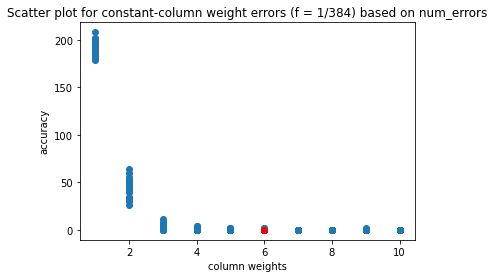

theoretical optimal column weight: 33.000
empirical optimal column weight: 7.000
------------------------------------------------------------


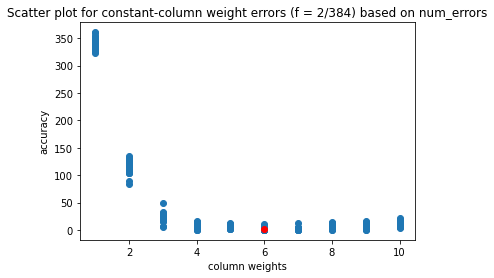

theoretical optimal column weight: 17.000
empirical optimal column weight: 6.000
------------------------------------------------------------


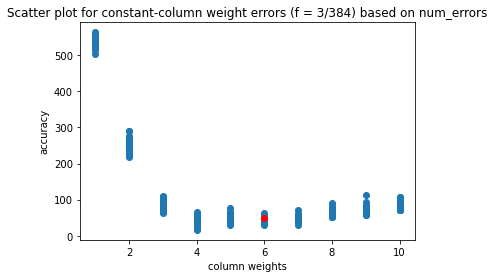

theoretical optimal column weight: 11.000
empirical optimal column weight: 4.000
------------------------------------------------------------


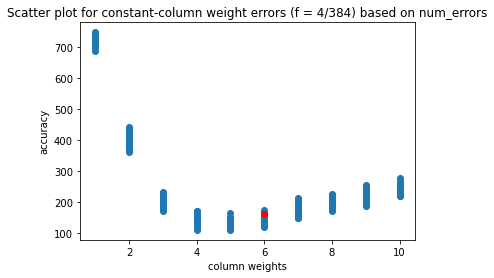

theoretical optimal column weight: 8.000
empirical optimal column weight: 5.000
------------------------------------------------------------


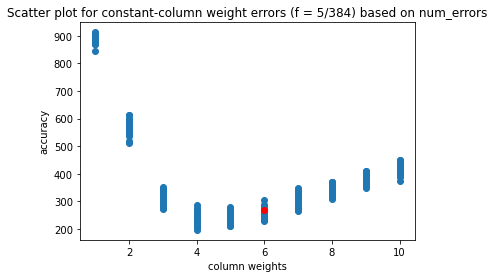

theoretical optimal column weight: 7.000
empirical optimal column weight: 4.000
------------------------------------------------------------


In [6]:
shental_num_errors = [0, 1, 49, 163, 267, 398, 588]
col_weights = range(1, 11)
num_trials = 100 
for k in range(1, 6): 
    plot_num_errors(k, 'num_errors', 'generate_doubly_regular_col')

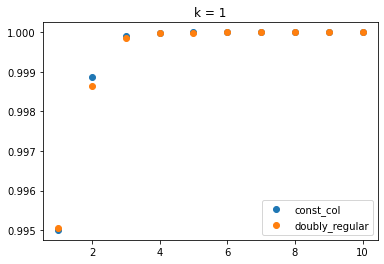

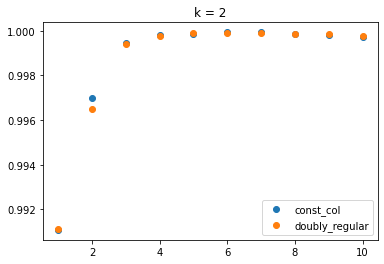

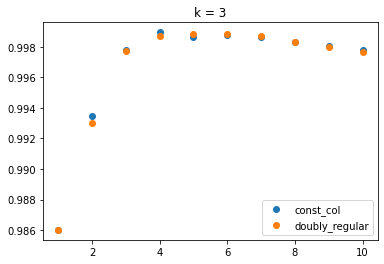

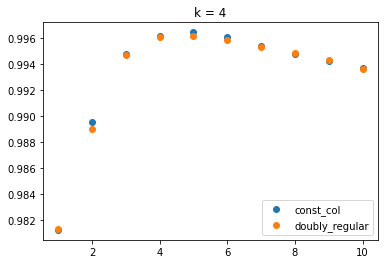

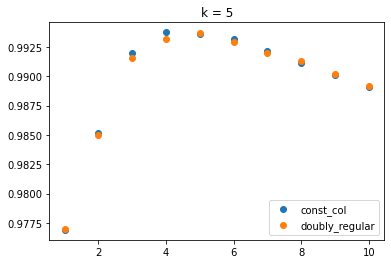

In [23]:
doubly_regular_dir = COVID_dir + '/tests/results/generate_doubly_regular_col/'
const_col_dir = COVID_dir + '/tests/results/generate_const_col_weight/'
for k in range(1, 6): 
    fig, ax = plt.subplots()
    _, _, average_acc = get_accuracy(COVID_dir, doubly_regular_dir, n, k, T, num_trials, num_random_matrices, col_weights, 'num_errors')
    plt.scatter(col_weights, average_acc, label = 'const_col')
    _, _, average_acc = get_accuracy(COVID_dir, const_col_dir, n, k, T, num_trials, num_random_matrices, col_weights, 'num_errors')
    plt.scatter(col_weights, average_acc, label = 'doubly_regular')
    ax.legend()
    plt.title("k = %s" % k)
    plt.show()